# Notebook 3 - Resolvendo uma equação não-linear e resolvendo um sistema linear

Gabrielly de Andrade da Silva - 116149740

## 1. Método de Newton

Esperamos que com esse método a função convirja para zero com inúmeras tentativas se achar a reta tangente (derivada) nos pontos.

Com esse método, queremos nos aproximar cada vez mais do zero da função através de iterações de cálculo de reta tangente.

![Método de Newton](./newton.gif)

Como a reta tangente é da forma $g(x) = ax + b$, sabemos que a derivada nesse ponto é dada por $f'(x_0)$, logo $g(x) = f'(x_0)x + b$.

Estamos interessados em descobrir a raiz da função (zero da função) de um ponto dessa equação g(x). Igualando a zero temos que:

$0 = g(x_1) = f'(x_0)*x_1 + b$ 

$b = -f'(x_0)*x_1$

Então:

$g(x) = f'(x_0)*x - f'(x_0)*x_1$

Como essa reta tangente da função $g$ compartilha um ponto comum com a função $f$, temos que

$f(x_0) = f'(x_0)*x_0 - f'(x_0)*x_1$

Isolando $x_1$ que é o próximo termo que queremos calcular chegamos a

$x_1 = x_0 - \frac{f(x_0)}{f'(x_0)}$

Conseguimos uma aproximação local se estivermos próximo da solução.

### Teorema de Taylor

$f(x+d) = f(x) + d*f'(x) + o(|d|)$

Se $f$ é diferenciável em torno de x. 
Repare que o último termo deve possuir limite com d tendendo a 0. 

Se d é pequeno, 

$f(x+d) = f(x) + d*f'(x)$ é uma boa aproximação para $f(x+d)$

Para esse método, ao invés de resolver $f(x)=0$ igual fizemos nos outros métodos, estamos interessados em escolher um ponto e calcular a sua reta tangente para resolver

$f(x_0) + d*f'(x_0) = 0$

### Calculando para sqrt(2)

In [114]:
f(x) = x^2 - 2
fd(x) = 2x
x = 1.0

1.0

In [28]:
# Aqui a cada interação vemos que o método já salta bem próximo para o resultado esperado (zero da função)
x = x - f(x) / fd(x)
x, f(x)

(1.4142135623730951, 4.440892098500626e-16)

In [99]:
x = big"1"

1

In [111]:
x = x - f(x) / fd(x)
x, f(x)

(1.414213562373095048801688724209698078569671875376948073176679737990732478462102, -1.727233711018888925077270372560079914223200072887256277004740694033718360632485e-77)

Esse método possui uma convergência quadrática, ou seja, ele consegue se aproximar do número de casas decimais de forma quadrada. Comparando com o método de bissecção, esse método é bem mais rápido se tiver condições favoráveis para a função.

In [130]:
function newton(f, fd, x; tol_absoluta = 1e-8, tol_relativa = 1e-8, tempo_maximo = 10.0, iteracao_maxima = 1000)
    fx = f(x)
    tolerancia = tol_absoluta + tol_relativa * abs(fx)
    
    iteracao = 0
    t0 = time()
    variacao_tempo = time() - t0
    status = :desconhecido

    resolvido = (abs(fx) <= tolerancia)
    iteracoes_demais = (iteracao >= iteracao_maxima || variacao_tempo >= tempo_maximo)
    
    while !(resolvido || iteracoes_demais)
        # Aqui estamos divivindo pela derivada e devemos nos atentar quando esse valor da zero
        fdx = fd(x)
        if abs(fdx) <= tolerancia
                status = :derivada_nula
                break
        end
        x = x - fx/fdx
        fx = f(x)
        
        iteracao += 1
        variacao_tempo = time() - t0
        resolvido = (abs(fx) <= tolerancia)
        iteracoes_demais = (iteracao >= iteracao_maxima || variacao_tempo >= tempo_maximo)
    end
    
    
    if resolvido
        status = :sucesso
    elseif iteracoes_demais
        if iteracao >= iteracao_maxima
            status = :maximo_de_iteracao_alcancada
        else
            status = :ttempo_maximo_alcancado
        end
    end
    
    return x, fx, status, iteracao
    
    
end

newton (generic function with 1 method)

In [131]:
f(x) = x^2 - 2
fd(x) = 2x
x = 1.0

1.0

In [132]:
newton(f, fd, 1.0)

(1.4142135623746899, 4.510614104447086e-12, :sucesso, 4)

In [133]:
newton(f, fd, big"1", tol_absoluta=1e-100, tol_relativa=0.0)

(1.414213562373095048801688724209698078569671875376948073176679737990732478462102, -1.727233711018888925077270372560079914223200072887256277004740694033718360632485e-77, :maximo_de_iteracao_alcancada, 1000)

In [136]:
f(x) = x * exp(x) - 1
fd(x) = exp(x) + x*exp(x)
newton(f, fd, 0.0)

(0.5671432965302959, 1.6912338640651114e-8, :sucesso, 5)

### Exemplo com valor de parcelas (tabela price)

In [144]:
qtd_parcelas = 48
valor = 40_000
parcela = 900
function equacao_price(i) 
    if i == 0
        return parcela - valor / qtd_parcelas
    else
        return parcela - valor * (1 + i)^qtd_parcelas * i / ((1 + i)^qtd_parcelas - 1)
    end
end
equacao_price(0)

66.66666666666663

Aqui não temos a derivada dessa função e gostaríamos de uma aproximação.

In [156]:
import Pkg; Pkg.add("ForwardDiff");

  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


In [157]:
using ForwardDiff;

In [147]:
equacao_price_der(i) = ForwardDiff.derivative(equacao_price, i)
newton(equacao_price, equacao_price_der, 1.0)

(0.003185958918278095, -0.00013304386357049225, :sucesso, 4)

### Exemplo com Fractal d $x^3 - x$

In [161]:
using Plots
gr(size=(600,400));

┌ Info: Saved animation to 
│   fn = /home/gabrielly/Documents/MAB230-Calculo-Numerico/Atividades/exemplo.gif
└ @ Plots /home/gabrielly/.julia/packages/Plots/vsE7b/src/animation.jl:104


Plots.AnimatedGif("/home/gabrielly/Documents/MAB230-Calculo-Numerico/Atividades/exemplo.gif")
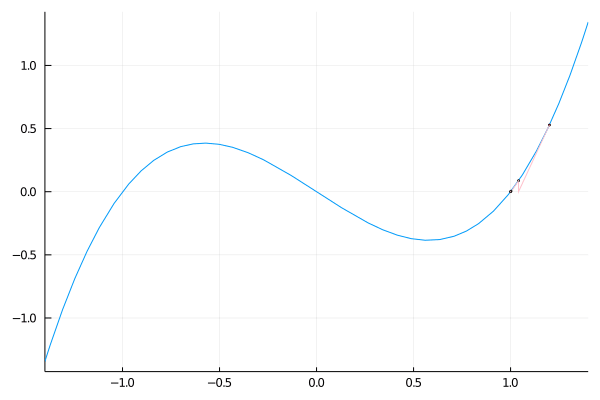

In [179]:
f(x) = x^3 - x
fd(x) = 3x^2 - 1

anim = Animation()
for x = 1.2:0.01:1.4
    plot(f, -1.4, 1.4, leg=false)
    scatter!([x], [f(x)], c=:red, ms=2)
    for k = 1:3
        xp = x - f(x) / fd(x)
        plot!([x, xp, xp], [f(x), 0, f(xp)], c=:pink)
        scatter!([xp], [f(xp)], c=:pink, ms=2)
        x = xp
    end

    xlims!(-1.4, 1.4)
    frame(anim)
end
gif(anim, "exemplo.gif", fps=10)

┌ Info: Saved animation to 
│   fn = /home/gabrielly/Documents/MAB230-Calculo-Numerico/Atividades/exemplo.gif
└ @ Plots /home/gabrielly/.julia/packages/Plots/vsE7b/src/animation.jl:104


Plots.AnimatedGif("/home/gabrielly/Documents/MAB230-Calculo-Numerico/Atividades/exemplo.gif")
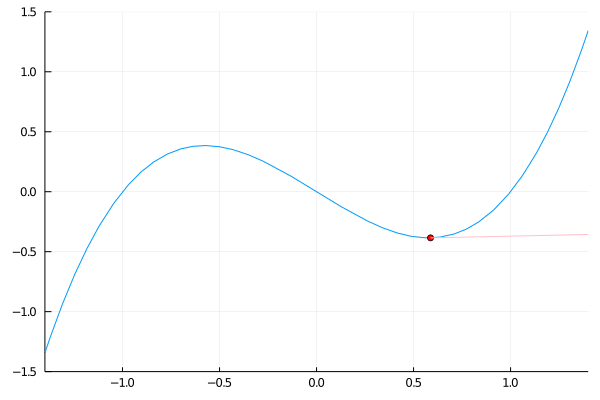

In [181]:
anim = Animation()
for x = sqrt(3)/3 + 1e-2:0.01:1.4
    plot(f, -1.4, 1.4, leg=false)
    scatter!([x], [f(x)], c=:red, ms=4)
    for k = 1:3
        xp = x - f(x) / fd(x)
        plot!([x, xp, xp], [f(x), 0, f(xp)], c=:pink)
        scatter!([xp], [f(xp)], c=:pink, ms=2)
        x = xp
    end

    xlims!(-1.4, 1.4)
    ylims!(-1.5, 1.5)
    frame(anim)
end
gif(anim, "exemplo.gif", fps=10)

┌ Info: Saved animation to 
│   fn = /home/gabrielly/Documents/MAB230-Calculo-Numerico/Atividades/exemplo.gif
└ @ Plots /home/gabrielly/.julia/packages/Plots/vsE7b/src/animation.jl:104


Plots.AnimatedGif("/home/gabrielly/Documents/MAB230-Calculo-Numerico/Atividades/exemplo.gif")
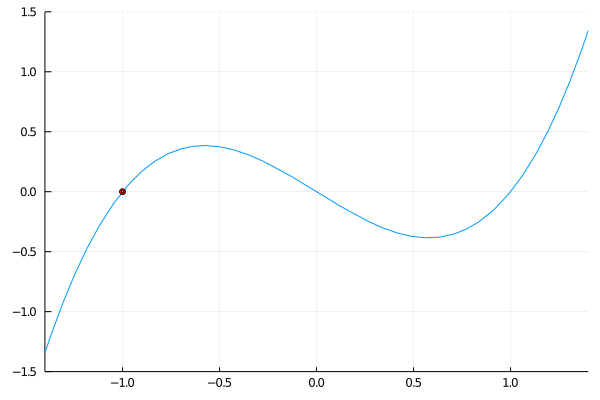

In [182]:
anim = Animation()
for x = -1.0:0.01:1.0
    plot(f, -1.4, 1.4, leg=false)
    scatter!([x], [f(x)], c=:red, ms=4)
    for k = 1:3
        xp = x - f(x) / fd(x)
        plot!([x, xp, xp], [f(x), 0, f(xp)], c=:pink)
        scatter!([xp], [f(xp)], c=:pink, ms=2)
        x = xp
    end

    xlims!(-1.4, 1.4)
    ylims!(-1.5, 1.5)
    frame(anim)
end
gif(anim, "exemplo.gif", fps=10)

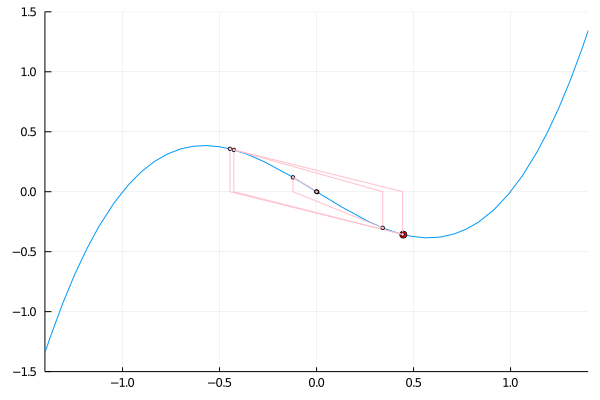

In [187]:
x = sqrt(5) / 5 - 1e-4
plot(f, -1.4, 1.4, leg=false)
scatter!([x], [f(x)], c=:red, ms=4)

for k = 1:10
    xp = x - f(x) / fd(x)
    plot!([x, xp, xp], [f(x), 0, f(xp)], c=:pink)
    scatter!([xp], [f(xp)], c=:pink, ms=2)
    x = xp
end

xlims!(-1.4, 1.4)
ylims!(-1.5, 1.5)

Dependendo do chute inicial do ponto, podemos ter um ciclo. 
O fractal é quando definimos onde cada um dos intervalos está convergindo, pois fractal é como tivessemos uma fronteira.

In [192]:
anim = Animation()
X = []
C = []
colors = [:red, :green, :blue]

for x = -1.4:0.01:1.4
    plot(f, -1.4, 1.4, leg=false)
    scatter!([x], [f(x)], c=:red, ms=4)
    push!(X,x)
    for k = 1:10
        xp = x - f(x) / fd(x)
        plot!([x, xp, xp], [f(x), 0, f(xp)], c=:pink)
        scatter!([xp], [f(xp)], c=:pink, ms=2)
        x = xp
    end
    j = argmin(abs.(x .- [-1, 0, 1]))
    push!(C, colors[j])
    
    for (xi, ci) in zip(X, C)
        plot!([xi, xi], [-1.5, 1.5], c=ci)
    end

    xlims!(-1.4, 1.4)
    ylims!(-1.5, 1.5)
    frame(anim)
end
gif(anim, "convergencia.gif", fps=10);

┌ Info: Saved animation to 
│   fn = /home/gabrielly/Documents/MAB230-Calculo-Numerico/Atividades/exemplo.gif
└ @ Plots /home/gabrielly/.julia/packages/Plots/vsE7b/src/animation.jl:104
